<a href="https://colab.research.google.com/github/ankit-rathi/Data-Science-with-Python/blob/master/All_in_One_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install pandas-ta
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import yfinance as yfin
yfin.pdr_override()
import pandas as pd
import pandas_ta as ta
# Request historic pricing data via finance.yahoo.com API
df = yfin.Ticker('^NSEI').history(period='1y')[['Close', 'Open', 'High', 'Volume', 'Low']]
# Calculate MACD values using the pandas_ta library
df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)
# View result
pd.set_option("display.max_columns", None)  # show all columns
print(df)

                                  Close          Open          High  Volume  \
Date                                                                          
2021-12-27 00:00:00+05:30  17086.250000  16937.750000  17112.050781  144800   
2021-12-28 00:00:00+05:30  17233.250000  17177.599609  17250.250000  176000   
2021-12-29 00:00:00+05:30  17213.599609  17220.099609  17285.949219  161700   
2021-12-30 00:00:00+05:30  17203.949219  17201.449219  17264.050781  320800   
2021-12-31 00:00:00+05:30  17354.050781  17244.500000  17400.800781  167000   
...                                 ...           ...           ...     ...   
2022-12-20 00:00:00+05:30  18385.300781  18340.300781  18404.900391  169000   
2022-12-21 00:00:00+05:30  18199.099609  18435.150391  18473.349609  187600   
2022-12-22 00:00:00+05:30  18127.349609  18288.800781  18318.750000  195700   
2022-12-23 00:00:00+05:30  17806.800781  17977.650391  18050.449219  221500   
2022-12-26 00:00:00+05:30  18014.599609  17830.40039

In [37]:
import numpy as np
import plotly.graph_objs as go
import plotly

def get_macd_plot(stock):
  # get ticker data
  df = yfin.Ticker(stock).history(period='1y')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
  # calculate MACD values
  df.ta.macd(close='close', fast=12, slow=26, append=True)
  # Force lowercase (optional)
  df.columns = [x.lower() for x in df.columns]
  # Construct a 2 x 1 Plotly figure
  fig = plotly.subplots.make_subplots(rows=2, cols=1)
  # price Line
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['open'],
          line=dict(color='#ff9900', width=1),
          name='open',
          # showlegend=False,
          legendgroup='1',
      ), row=1, col=1
  )
  # Candlestick chart for pricing
  fig.append_trace(
      go.Candlestick(
          x=df.index,
          open=df['open'],
          high=df['high'],
          low=df['low'],
          close=df['close'],
          increasing_line_color='#ff9900',
          decreasing_line_color='black',
          showlegend=False
      ), row=1, col=1
  )
  # Fast Signal (%k)
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['macd_12_26_9'],
          line=dict(color='#ff9900', width=2),
          name='macd',
          # showlegend=False,
          legendgroup='2',
      ), row=2, col=1
  )
  # Slow signal (%d)
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['macds_12_26_9'],
          line=dict(color='#000000', width=2),
          # showlegend=False,
          legendgroup='2',
          name='signal'
      ), row=2, col=1
  )
  # Colorize the histogram values
  colors = np.where(df['macdh_12_26_9'] < 0, '#000', '#ff9900')
  # Plot the histogram
  fig.append_trace(
      go.Bar(
          x=df.index,
          y=df['macdh_12_26_9'],
          name='histogram',
          marker_color=colors,
      ), row=2, col=1
  )
  # Make it pretty
  layout = go.Layout(
      plot_bgcolor='#efefef',
      # Font Families
      font_family='Monospace',
      font_color='#000000',
      font_size=20,
      xaxis=dict(
          rangeslider=dict(
              visible=False
          )
      )
  )
  # Update options and show plot
  fig.update_layout(layout)
  fig.show()

stock = 'AXISBANK.NS'
get_macd_plot(stock)

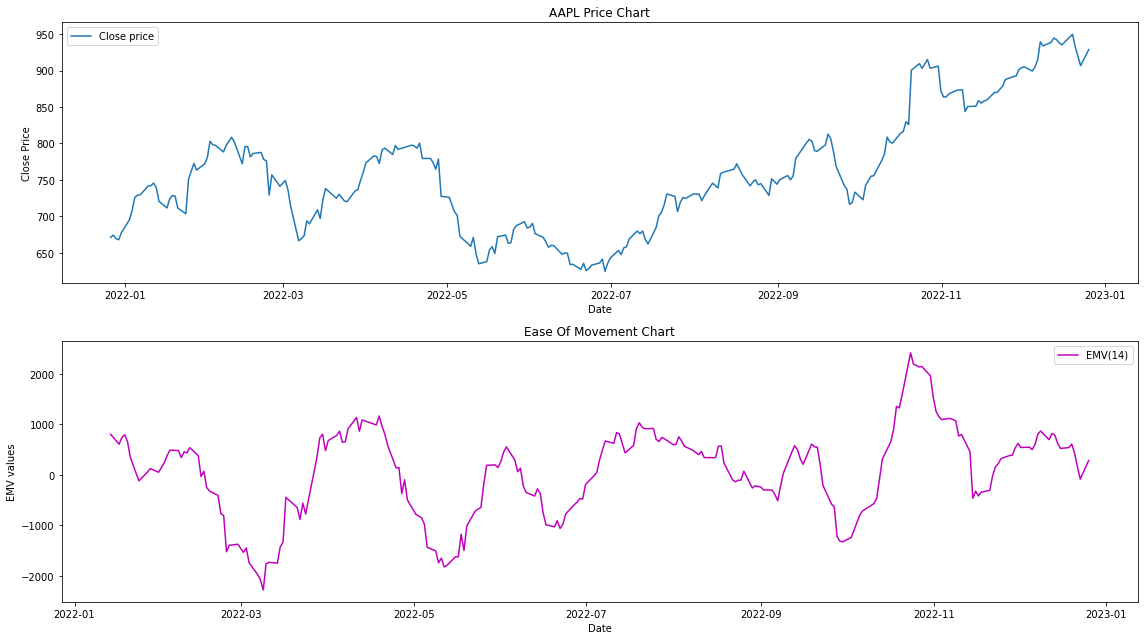

In [38]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yfin
yfin.pdr_override()
import matplotlib.pyplot as plt
 
# Ease of Movement 
def EMV(data, ndays): 
    dm = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
    br = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
    EMV = dm / br 
    EMV_MA = pd.Series(EMV.rolling(ndays).mean(), name = 'EMV') 
    data = data.join(EMV_MA) 
    return data 
 
# Retrieve the AAPL data from Yahoo finance
data = yfin.Ticker('AXISBANK.NS').history(period='1y')  

# Compute the 14-day Ease of Movement for AAPL
n = 14
AAPL_EMV = EMV(data, n)
EMV = AAPL_EMV['EMV']

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(16, 9))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('AAPL Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Plot the close price of the Apple
plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Ease Of Movement Chart')
plt.xlabel('Date')
plt.ylabel('EMV values')

# Plot the ease of movement
plt.plot(EMV, 'm', label='EMV(14)')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
import pandas_ta as ta
ta.eom(data['Low'],data['Close'],data['Volume'],14)

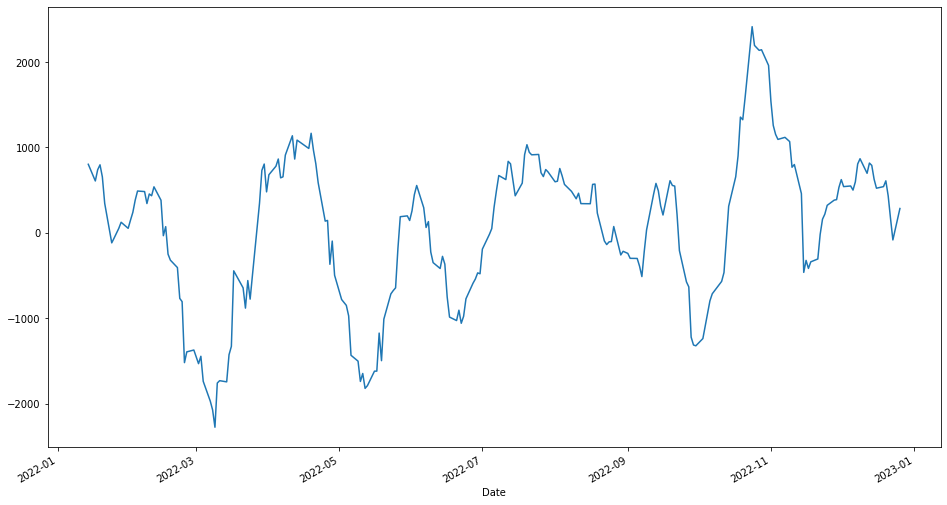

In [51]:
data.ta.eom().plot.line(figsize=(16, 9))

In [61]:
data.ta.rsi(append=True)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,EOM_14_100000000,RSI_14
Date,,,,,,,,,
2021-12-27 00:00:00+05:30,662.042273,673.574707,654.953088,671.128479,6996729,0.0,0.0,NaN,NaN
2021-12-28 00:00:00+05:30,676.270565,679.815157,670.978632,674.423401,4645547,0.0,0.0,NaN,NaN
2021-12-29 00:00:00+05:30,673.474878,678.567102,666.235896,669.480957,3969894,0.0,0.0,NaN,NaN
2021-12-30 00:00:00+05:30,666.984751,672.076976,663.490071,667.833435,5119705,0.0,0.0,NaN,NaN
2021-12-31 00:00:00+05:30,671.927212,685.456606,670.179872,677.518677,5586980,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-20 00:00:00+05:30,943.750000,952.750000,940.450012,949.750000,9511818,0.0,0.0,608.919328,73.557934
2022-12-21 00:00:00+05:30,953.099976,958.900024,928.000000,932.299988,8368960,0.0,0.0,432.420557,61.372890
2022-12-22 00:00:00+05:30,936.000000,936.000000,912.950012,919.549988,9202717,0.0,0.0,166.869156,54.295681


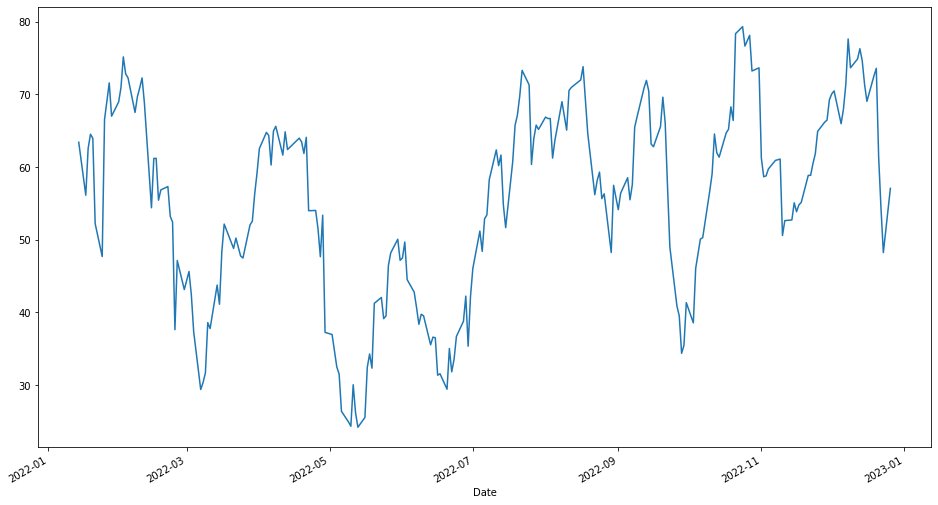

In [52]:
data.ta.rsi().plot.line(figsize=(16, 9))

In [82]:
df = yfin.Ticker('^NSEI').history(period='1y')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
# Force lowercase (optional)
df.columns = [x.lower() for x in df.columns]
# calculate MACD values
df['200_ema'] = round(df['close'].ewm(span = 200, adjust = False).mean(),0) 
df['50_ema'] = round(df['close'].ewm(span = 50, adjust = False).mean(),0) 
df.ta.macd(close='close', fast=12, slow=26, append=True)
df.ta.eom(append=True)
df.ta.rsi(append=True)

df = df[df.index > '2022-03-31']
# Force lowercase (optional)
df.columns = [x.lower() for x in df.columns]
# Construct a 2 x 1 Plotly figure
fig = plotly.subplots.make_subplots(rows=4, cols=1)
# price Line
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['close'],
        line=dict(color='#0000ff', width=1),
        name='price',
        # showlegend=False,
        # legendgroup='1',
    ), row=1, col=1
)
# EMA 200
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['200_ema'],
        line=dict(color='#000000', width=2),
        name='200 ema',
        # showlegend=False,
        # legendgroup='2',
    ), row=1, col=1
)
# EMA 50
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['50_ema'],
        line=dict(color='#ff9900', width=2),
        name='50 ema',
        # showlegend=False,
        # legendgroup='2',
    ), row=1, col=1
)
# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['macd_12_26_9'],
        line=dict(color='#ff9900', width=2),
        name='macd',
        # showlegend=False,
        # legendgroup='2',
    ), row=2, col=1
)
# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['macds_12_26_9'],
        line=dict(color='#000000', width=2),
        # showlegend=False,
        # legendgroup='2',
        name='signal'
    ), row=2, col=1
)
# Colorize the histogram values
colors = np.where(df['macdh_12_26_9'] < 0, '#000', '#ff9900')
# Plot the histogram
fig.append_trace(
    go.Bar(
        x=df.index,
        y=df['macdh_12_26_9'],
        name='histogram',
        marker_color=colors,
    ), row=2, col=1
)
# RSI
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['rsi_14'],
        line=dict(color='#00ff00', width=2),
        name='rsi',
        # showlegend=False,
        legendgroup='2',
    ), row=3, col=1
)
# EOM
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['eom_14_100000000'],
        line=dict(color='#ff0000', width=2),
        name='eom',
        # showlegend=False,
        legendgroup='2',
    ), row=4, col=1
)
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    width=1500, 
    height=1000,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.show()

,open,close,low,high,volume,200_ema,50_ema,macd_12_26_9,macdh_12_26_9,macds_12_26_9,eom_14_100000000,rsi_14
Date,,,,,,,,,,,,
2022-04-01 00:00:00+05:30,17436.900391,17670.449219,17422.699219,17703.699219,291800,17157.0,17126.0,145.304005,95.645129,49.658877,3.293804e+06,62.839666
2022-04-04 00:00:00+05:30,17809.099609,18053.400391,17791.400391,18114.650391,345500,17166.0,17162.0,196.915177,117.805040,79.110137,4.847633e+06,68.460913
2022-04-05 00:00:00+05:30,18080.599609,17957.400391,17921.550781,18095.449219,283500,17173.0,17193.0,227.449112,118.671181,108.777932,5.131505e+06,65.774795
2022-04-06 00:00:00+05:30,17842.750000,17807.650391,17779.849609,17901.000000,328800,17180.0,17218.0,236.833830,102.444719,134.389111,3.982182e+06,61.707544
2022-04-07 00:00:00+05:30,17723.300781,17639.550781,17623.699219,17787.500000,308800,17184.0,17234.0,228.077912,74.951041,153.126872,2.537000e+06,57.415582
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-20 00:00:00+05:30,18340.300781,18385.300781,18202.650391,18404.900391,169000,17471.0,18191.0,64.313904,-60.157330,124.471234,-3.548237e+06,49.212177
2022-12-21 00:00:00+05:30,18435.150391,18199.099609,18162.750000,18473.349609,187600,17478.0,18191.0,37.352647,-69.694869,107.047516,-3.659777e+06,42.707201
2022-12-22 00:00:00+05:30,18288.800781,18127.349609,18068.599609,18318.750000,195700,17484.0,18189.0,10.079837,-77.574143,87.653980,-4.305068e+06,40.486416
